In [ ]:
from time import time,ctime
print("Akshat Kumar 242211003")
print("Timestamp: "+ctime(time()))

Akshat Kumar 242211003
Timestamp: Wed Mar 19 05:52:40 2025


In [ ]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [ ]:
# read in the data and check the first 5 rows
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The last column, **Unnamed:32**, seems like it has a whole bunch of missing values. Let's quickly check for any missing values for other columns as well.

In [ ]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

It looks like our data does not contain any missing values, except for our suspect column **Unnamed: 32**, which is full of missing values. Let's go ahead and remove this column entirely. After that, let's check for the data type of each column.

In [ ]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
# check the data type of each column
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


<ipython-input-6-bb896022c58e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['diagnosis'], palette='RdBu')


Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


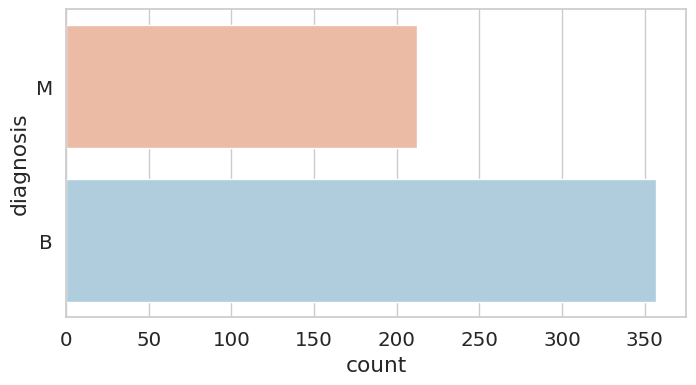

In [ ]:
# visualize distribution of classes
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

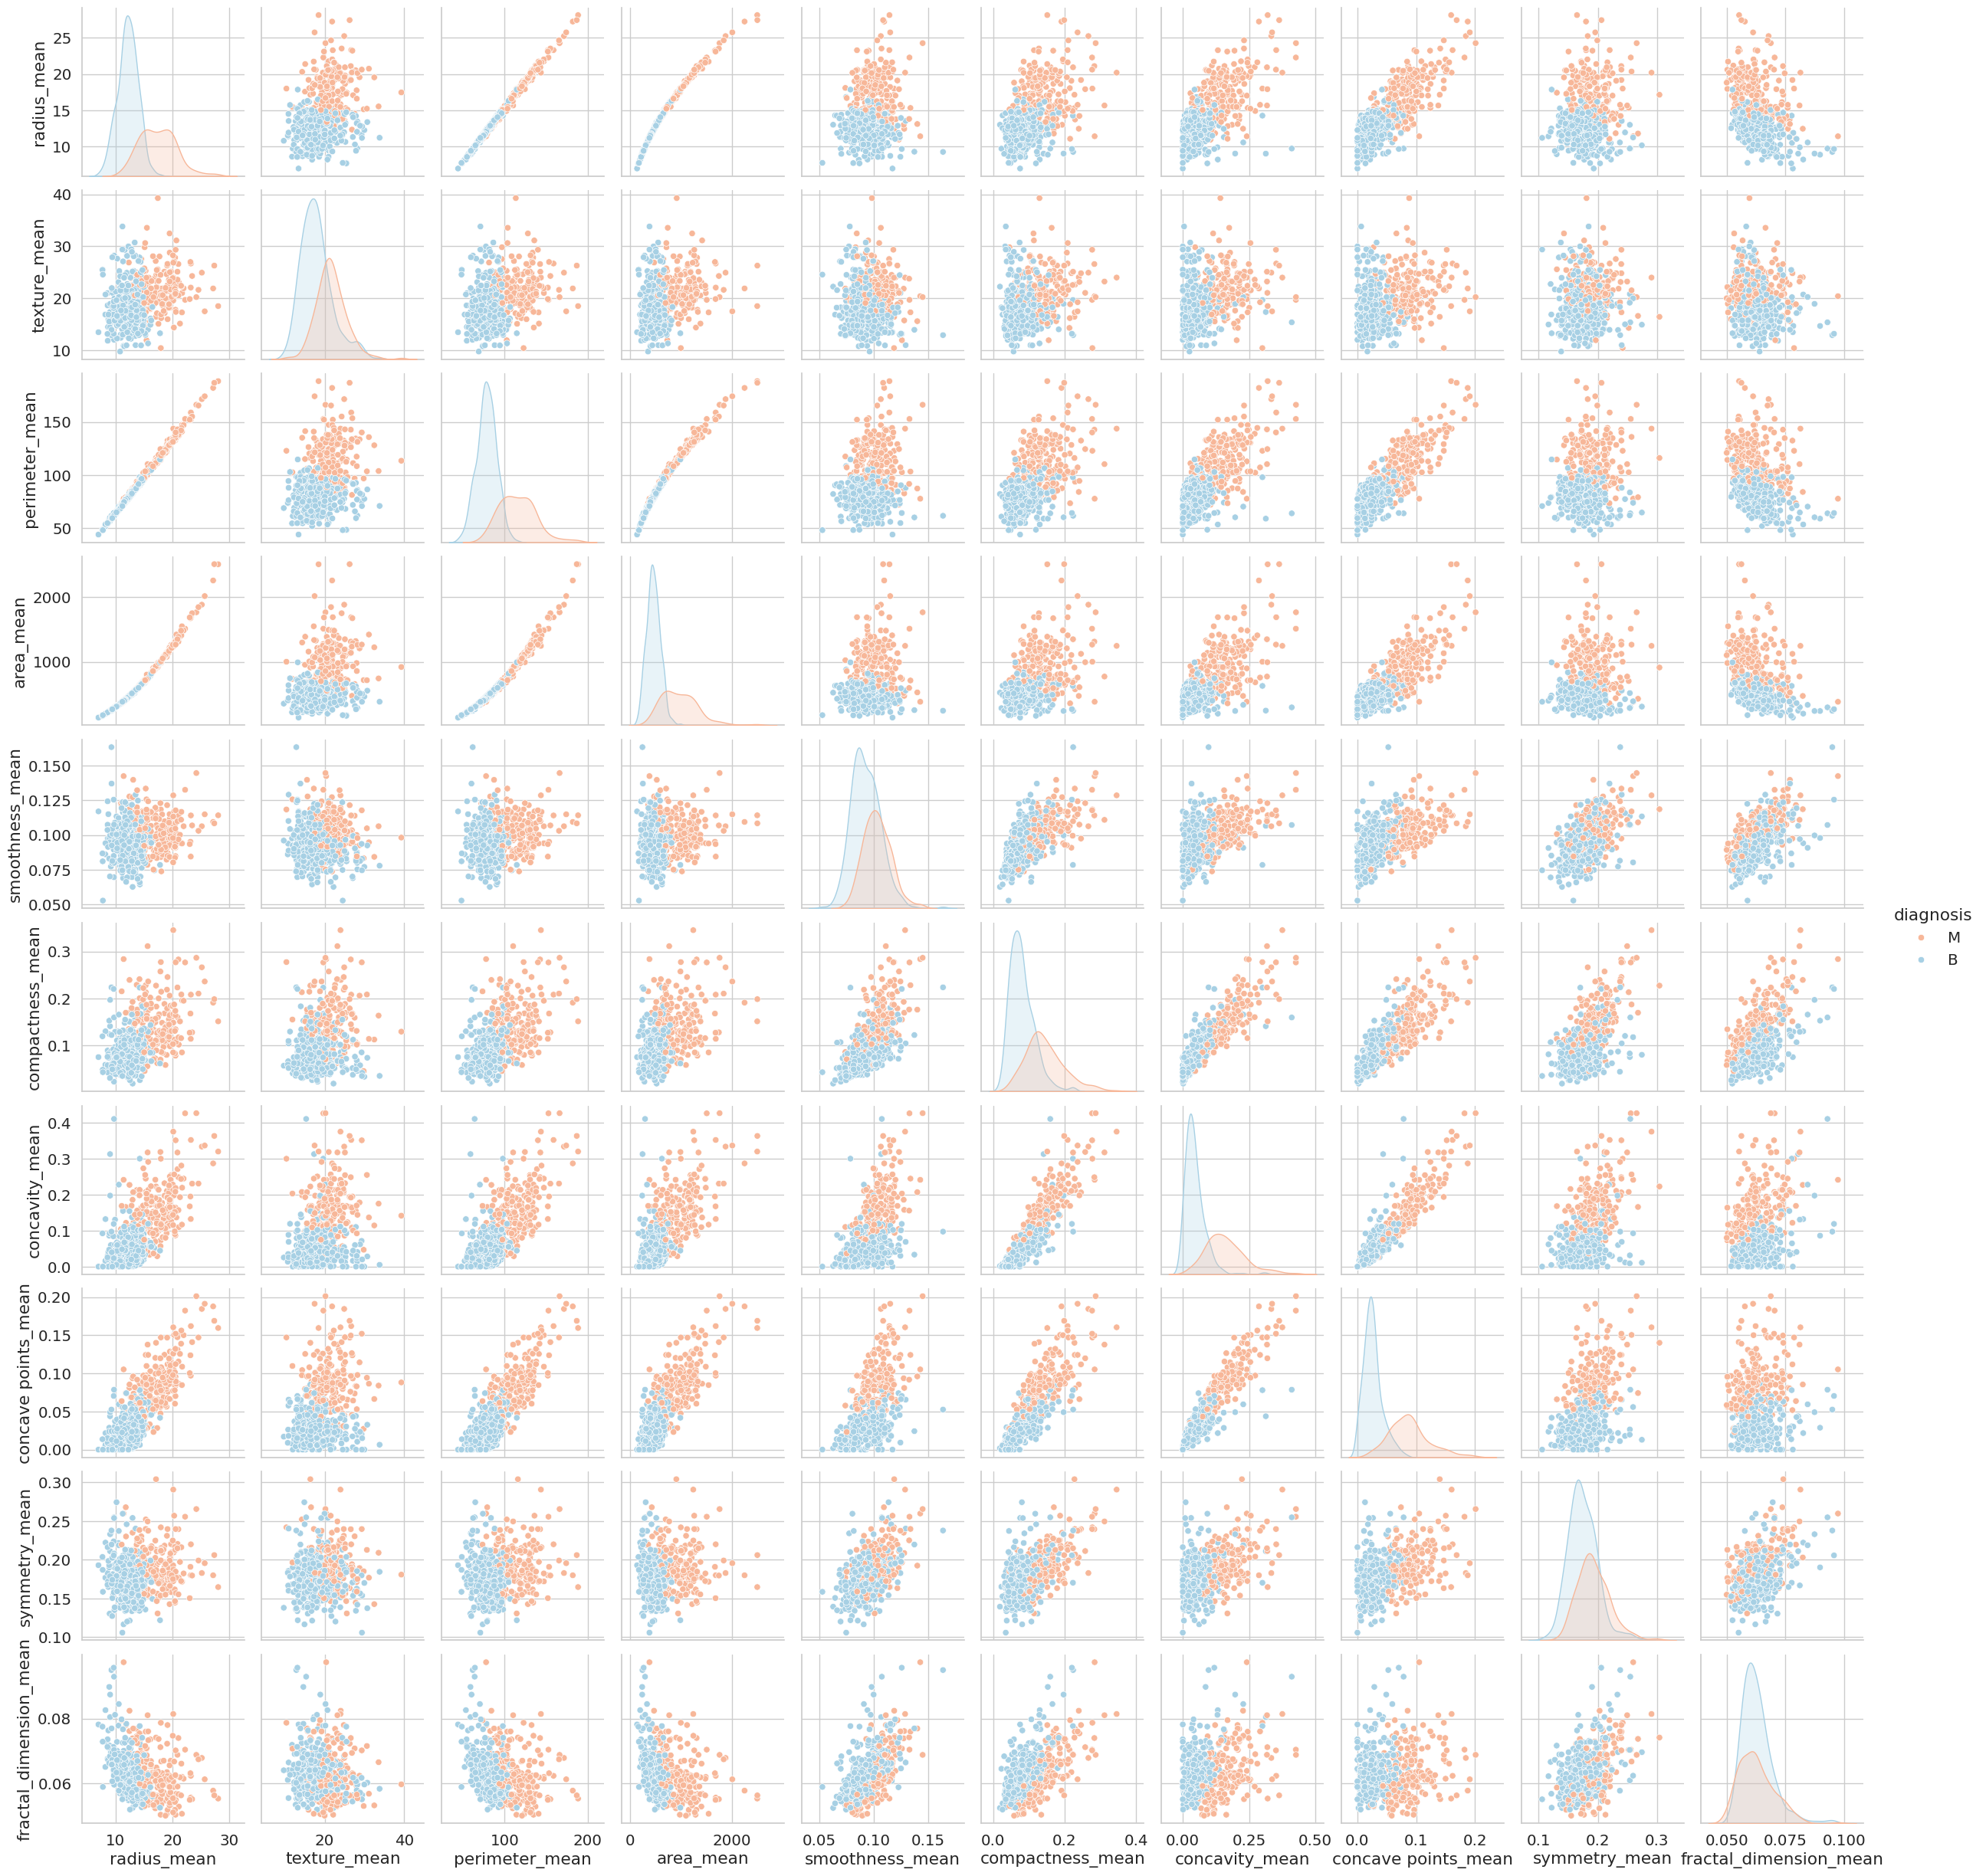

In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

In [ ]:
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
# first, drop all "worst" columns
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

# 3. The Model
___

We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make.

Target variable (y): Diagnosis (0 = Benign, 1 = Malignant).
Feature (X): mean radius

In [ ]:
# Split the data into training and testing sets
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [ ]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [ ]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Wed, 19 Mar 2025   Deviance:                       110.68
Time:                                      05:31:09   Pearson chi2:                     125.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6539
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

In [ ]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

,0
id,
848406,0.324251
907915,0.996906
911201,0.964710
84799002,0.000544
8911164,0.838719


In [ ]:
# Note how the values are numerical.
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['M', 'B', 'B', 'M', 'B']

In [ ]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions',
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.982     0.965     0.974       115
           M      0.931     0.964     0.947        56

    accuracy                          0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54
Correct Predictions 96.5 %


Epoch 0, Loss: [0.69314718]
Epoch 100, Loss: [0.37121731]
Epoch 200, Loss: [0.33406895]
Epoch 300, Loss: [0.32136601]
Epoch 400, Loss: [0.31552342]
Epoch 500, Loss: [0.31242775]
Epoch 600, Loss: [0.31064674]
Epoch 700, Loss: [0.30956594]
Epoch 800, Loss: [0.30888535]
Epoch 900, Loss: [0.30844513]
Training accuracy: 54.44%
Testing accuracy: 54.09%


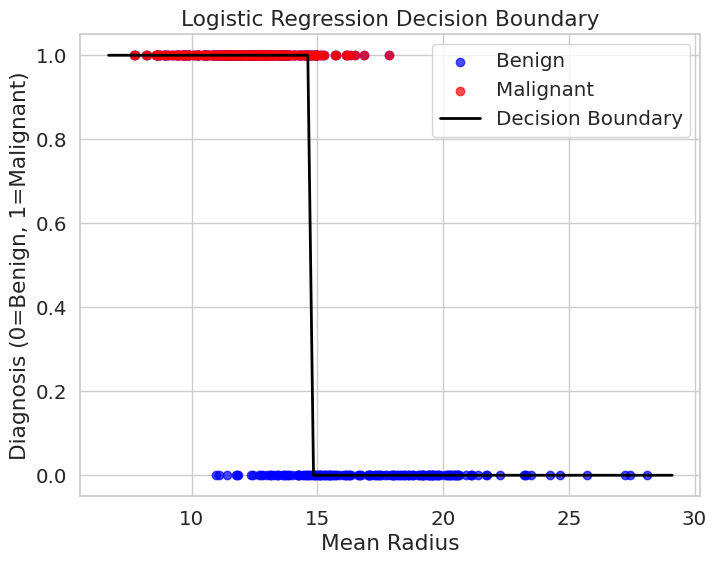

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
# For demonstration purposes, we'll use sklearn's dataset.
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, 0].reshape(-1, 1)  # Use the 'mean radius' feature only
y = data.target  # Diagnosis: 0 = Benign, 1 = Malignant

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Sigmoid Activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Implement Binary Cross-Entropy Loss
def binary_cross_entropy_loss(y, y_pred):
    m = len(y)
    loss = -1/m * (np.dot(y, np.log(y_pred)) + np.dot(1 - y, np.log(1 - y_pred)))
    return loss

# Gradient Descent to optimize weights
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m = len(X)
    weights = np.zeros((X.shape[1], 1))  # Initialize weights to zero
    bias = 0  # Initialize bias to zero
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add bias term to X (intercept)

    for epoch in range(epochs):
        # Forward pass: Compute predictions
        z = np.dot(X, np.vstack([bias, weights]))  # Linear combination
        y_pred = sigmoid(z)

        # Compute the loss
        loss = binary_cross_entropy_loss(y, y_pred)

        # Backward pass: Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y.reshape(-1, 1)))  # Reshape y to (m, 1)
        db = (1/m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw[1:]  # Update only the weights, excluding bias
        bias -= learning_rate * db

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, bias

# Train the model
weights, bias = logistic_regression(X_train, y_train)

# Make predictions
def predict(X, weights, bias):
    m = len(X)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add bias term to X (intercept)
    z = np.dot(X, np.vstack([bias, weights]))
    return sigmoid(z) >= 0.5  # Return 1 if prediction >= 0.5, else 0

# Evaluate the model
train_preds = predict(X_train, weights, bias)
test_preds = predict(X_test, weights, bias)

train_accuracy = np.mean(train_preds == y_train)
test_accuracy = np.mean(test_preds == y_test)

print(f'Training accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing accuracy: {test_accuracy * 100:.2f}%')

# Plot Decision Boundary
# We will plot a decision boundary for visualization

def plot_decision_boundary(X, y, weights, bias):
    # Create a range of values for mean radius (X)
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)

    # Predict using the logistic regression model
    predictions = predict(xx, weights, bias)

    # Plotting the decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Benign', alpha=0.7)
    plt.scatter(X[y == 1], y[y == 1], color='red', label='Malignant', alpha=0.7)
    plt.plot(xx, predictions, color='black', lw=2, label='Decision Boundary')
    plt.xlabel('Mean Radius')
    plt.ylabel('Diagnosis (0=Benign, 1=Malignant)')
    plt.legend()
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, weights, bias)